# Linear Regression
* First public exposition of linear regression with least square method is publish in 1805
* Linear regression is defined that relationship that can be define by a straight line while drawing a straight line we have to consider that where is the residual error is minimum **or** `Linear regression allow us to build the relationship between multiple features to estimate output target`
* **Rsidual Error -** it is the distance between the point and the line
* **Linear relationship --** `y = mx+b`

* **OLS(ordinary least square) --** working with only simple linear regression problem


## 1. Simple linear Regression
* Limited to one x feature **y = mx+b** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import dataset
df = pd.read_csv("C:\\Users\\Rahul\\ML_data\\ad.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# as we know we can only use one feature in case of simple linear regression
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,total_spend
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4
3,4,151.5,41.3,58.5,18.5,251.3
4,5,180.8,10.8,58.4,12.9,250.0


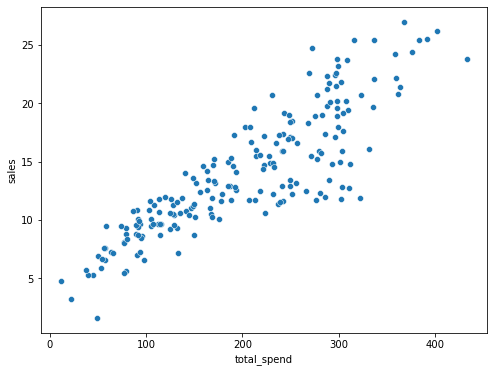

In [12]:
# now we have total spend and th sales so we can plot the dataframe using scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x= "total_spend", y= "sales")
plt.show();


**as we saw that if we increaing our ad spend we get more sales so we can draw the simpel linear regression line** 

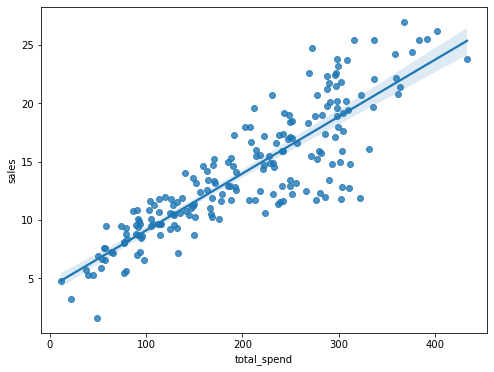

In [13]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="total_spend", y="sales")
plt.show();

**as we know that for simple linear regression we need to find out:-**
1. y = mx+b
2. y = B1x+B0  **here B1 and B0 are the beta coiefficents**
3. for simple **Linear regression** we use **np.polyfit**
    * here poly stands for polynomial which means we can use x,x^2,x^3........

In [14]:
# set up features and labels
X = df["total_spend"]
y = df["sales"]

In [16]:
result_arr = np.polyfit(x = X, y = y, deg=1)
result_arr

array([0.04868788, 4.24302822])

In [19]:
B1, B0 = result_arr[0], result_arr[1]
B1,B0

(0.04868787931904819, 4.2430282160363255)

In [22]:
# now make some data acc to range of total_spend
potential_spend = np.linspace(0,500,100)
potential_spend[:10]

array([ 0.        ,  5.05050505, 10.1010101 , 15.15151515, 20.2020202 ,
       25.25252525, 30.3030303 , 35.35353535, 40.4040404 , 45.45454545])

In [24]:
# now making prediction using formula "y = B1x+B0"
pred_sales = B1*potential_spend+B0
pred_sales[:10]

array([4.24302822, 4.4889266 , 4.73482498, 4.98072336, 5.22662174,
       5.47252012, 5.7184185 , 5.96431688, 6.21021526, 6.45611364])

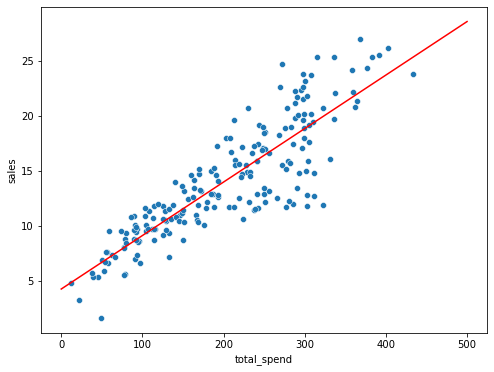

In [36]:
# now visualizing our prediction and the actual dataset
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="total_spend", y="sales")
plt.plot(potential_spend, pred_sales, color="red")
plt.show();

In [37]:
# let's make some prediction
spend = 250
preds  = B1*spend+B0
preds

16.41499804579837

In [38]:
# now let's work with 3 degree
res_arr = np.polyfit(X,y,3)
res_arr

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

`now instead of y= B1x+B0 we use y = B3x**3+B2x**2+B1x**1+B0`

In [40]:
pred_sales_new = 3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend +2.70495053e+00
pred_sales_new[:10]

array([2.70495053, 3.11474825, 3.51512186, 3.90630911, 4.28854779,
       4.66207567, 5.02713053, 5.38395013, 5.73277224, 6.07383466])

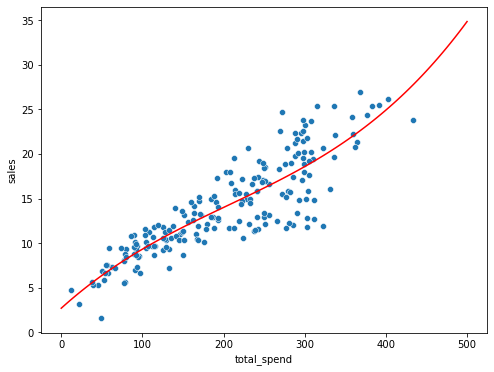

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="total_spend", y="sales")
plt.plot(potential_spend, pred_sales_new, color="red")
plt.show();

## Scikit-Learn 

In [43]:
# dataset
df = pd.read_csv("C:\\Users\\Rahul\\ML_data\\ad.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


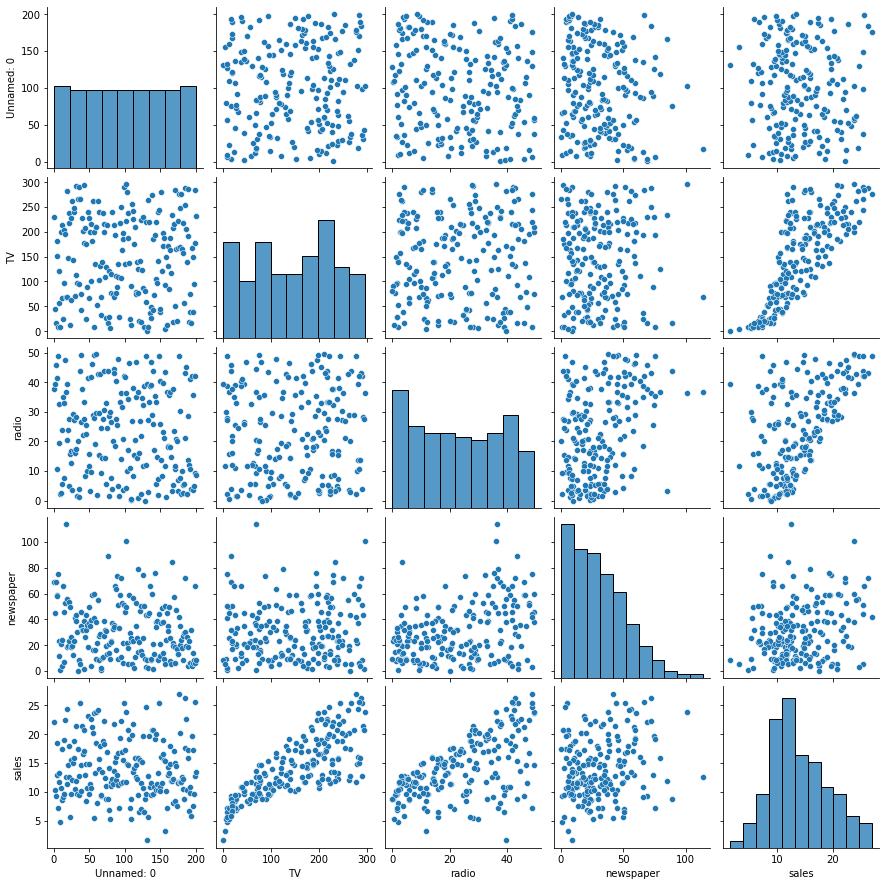

In [44]:
# for finging the relationship between every features and labels we can plot all of these for we can use both matplotlib and seaborns
sns.pairplot(df)

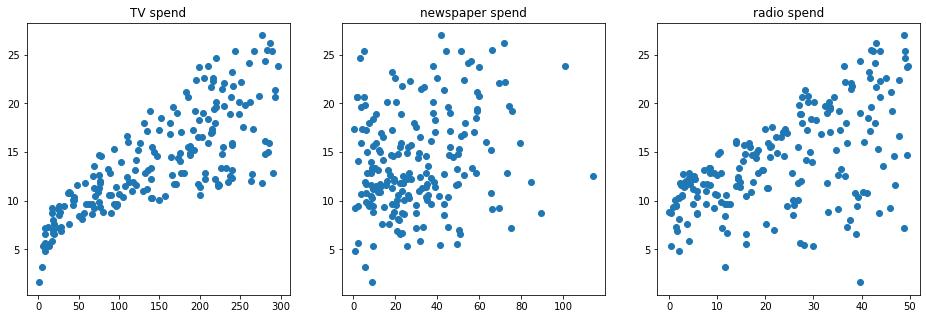

In [54]:
fig,axes = plt.subplots(nrows=1, ncols = 3 , figsize=(16,5))
axes[0].plot(df["TV"], df["sales"], "o")
axes[0].set_title("TV spend")

axes[1].plot(df["newspaper"], df["sales"], "o")
axes[1].set_title("newspaper spend")

axes[2].plot(df["radio"], df["sales"], "o")
axes[2].set_title("radio spend")
plt.show();

In [58]:
# setup features and labels
X = df.drop("sales", axis=1)
X

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [59]:
y = df["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 42, test_size = 0.3)

In [66]:
len(X_train), len(X_test), len(y_train), len(y_test)

(140, 60, 140, 60)

### 1. Model_1. Linear_Regression with scikit-learn

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
# Create model_1
model_1 = LinearRegression()
# fit model_1
model_1.fit(X_train, y_train)


LinearRegression()

In [70]:
# make prediction on model_1
model_1_pred = model_1.predict(X_test)
model_1_pred[:10]

array([16.56581778, 21.1804797 , 21.54440211, 10.89594674, 22.20422155,
       13.35811188, 21.19371189,  7.35723223, 13.28243942, 15.11907355])

#### Evaluation performance of Regression
**as we know that for Regression problem accuracy and recall are not suitable. For evaluation purpose of Regression we have these metrics/method**
* **1. MAE - Mean Absolute Error**
* **2. MSE - Mean Squared Error**
* **3. RMSE - Root Mean Square Error**

In [71]:
# let's finding the error in our model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Model_1_MAE**

In [72]:
model_1_mae = mean_absolute_error(y_true=y_test, y_pred=model_1_pred)
model_1_mae

1.5120955091829722

**Model_1_MSE**

In [73]:
model_1_mse = mean_squared_error(y_true=y_test, y_pred = model_1_pred)
model_1_mse

3.797646660967102

**Model_1_RMSE**

In [74]:
model_1_rmse = np.sqrt(model_1_mse)
model_1_rmse

1.9487551567518948

In [75]:
# for finding that this error is acceptable or not we can use the distribution and average value of sales
# mean value
df["sales"].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

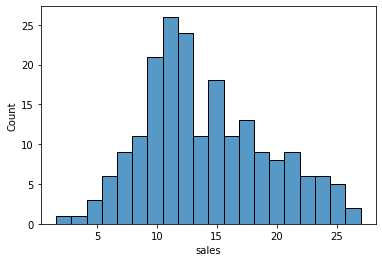

In [76]:
# distribution of sales
sns.histplot(df["sales"], bins=20)

#### Residual Error

In [78]:
model_1_residual_error = y_test - model_1_pred
model_1_residual_error[:10]

95     0.334182
15     1.219520
30    -0.144402
158   -3.595947
128    2.495778
115   -0.758112
69     1.106288
170    1.042768
174   -1.782439
45    -0.219074
Name: sales, dtype: float64

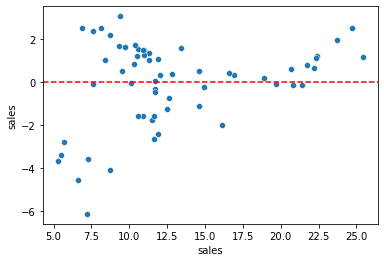

In [83]:
# plot our residual error to check out this dataset is valid for linear regression or not
sns.scatterplot(x=y_test, y=model_1_residual_error)
plt.axhline(y=0, ls="--", color="red")

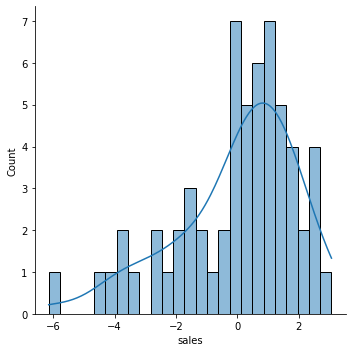

In [86]:
sns.displot(model_1_residual_error, bins = 25, kde=True)

<AxesSubplot:xlabel='sales', ylabel='Density'>

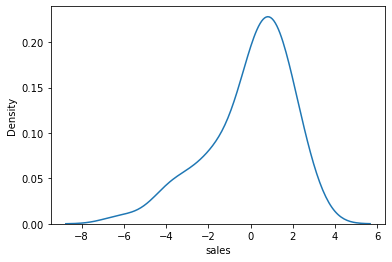

In [87]:
sns.kdeplot(model_1_residual_error)

## Model Deployment 
saving and loading model

In [88]:
model_1_final = LinearRegression()
# here we fit our final model on whole dataset
model_1_final.fit(X, y)


LinearRegression()

In [90]:
model_1_final.coef_

array([-0.00057983,  0.04577592,  0.18838318, -0.00124333])

In [99]:
X.head()

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [98]:
y_hat = model_1_final.predict(X)   # we can predict it but as we know our model know this dataset on training phase so testing it on same data is not does anything good to us.
y_hat[:10]

array([20.57251457, 12.38846299, 12.35144103, 17.64543251, 13.24052459,
       12.51866879, 11.78301601, 12.180724  ,  3.78802522, 12.60887762])

**here these coefficient says that on increase one unit on the feature side/x-axis side there is the B coefficient times increase in y-axis**

* **so here coefficient give us these information about our perticular features**
    * **If coefficient is postive than it's good to consider and it gives tha better result**
    * **If coefficent is negative than it's not good to consider**
    * **And if coefficent is 0 than it's have no effect on perfromance so it's good to leave it**

**So if we want to visualize our model perfomance through graph we can plot our real plot vs pred plot to check our our model performance but if we have more tha 4-5 features it tidious to do the task**

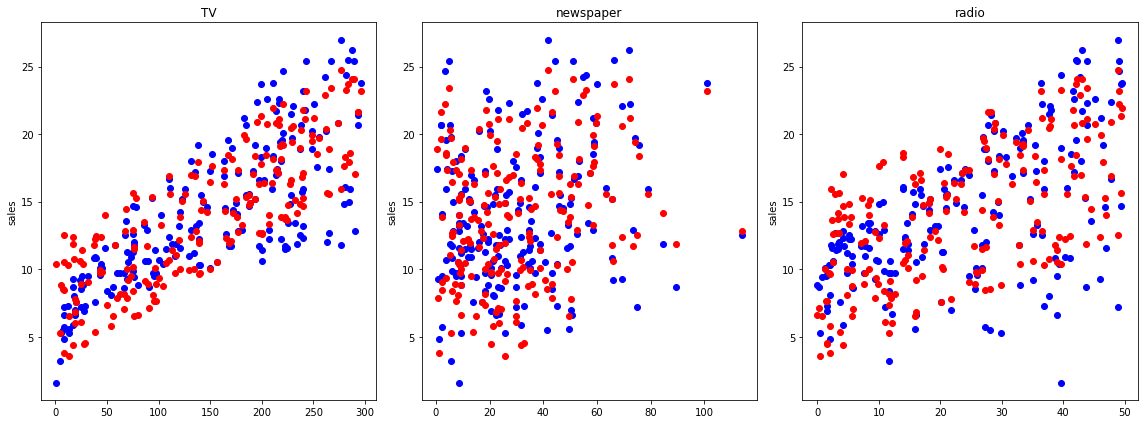

In [101]:
# plotting our model performance 
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df["TV"], df["sales"], "o", color="blue")
axes[0].plot(df["TV"], y_hat, "o", color="red")
axes[0].set_title("TV")
axes[0].set_ylabel("sales")

axes[1].plot(df["newspaper"], df["sales"], "o", color="blue")
axes[1].plot(df["newspaper"], y_hat, "o", color="red")
axes[1].set_title("newspaper")
axes[1].set_ylabel("sales")

axes[2].plot(df["radio"], df["sales"], "o", color="blue")
axes[2].plot(df["radio"], y_hat, "o", color="red")
axes[2].set_title("radio")
axes[2].set_ylabel("sales")
plt.tight_layout();

### Sving and loading model

In [102]:
from joblib import dump,load

In [106]:
# save model
dump(model_1_final, filename="model_1_final.joblib")

['model_1_final.joblib']

In [109]:
# load model
loaded_model =load("model_1_final.joblib")

In [110]:
loaded_model.coef_

array([-0.00057983,  0.04577592,  0.18838318, -0.00124333])

## Polynomial Regression
**This type of regression resolve two issue for us**
* 1. when feature/data is non linear like y = log(x) **So may be we get a better result with a higher degree of fetures  y = log(x)^2, y = log(x)^3**

* 2. when there is intraction between two features like **in our Advertising example if we combine TV and newspaper together we get better result in campare of single featue like TV or newspaper only**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ad = pd.read_csv("C://Users//Rahul//ML_data/Advertising.csv")
df_ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# setting up features
X = df_ad.drop(["sales"], axis=1)
y = df_ad["sales"]

In [8]:
X.head(5)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [9]:
y.head(5)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [34]:
# First we need to preprocessing our dataset
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly_converter = PolynomialFeatures(degree = 2,
                                    include_bias = False
)

In [15]:
# We can preprocess our dataset in two way 
#poly_converter.fit(X)
# poly_features = poly_converter.transform(X) or
poly_features = poly_converter.fit_transform(X)
poly_features[0]


array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

**PolynomaialFeature transform our data in 3 form**

  *  1. the real values 
  *  2. Squared values
  *  3. intracted values

In [16]:
# we have to split our polynomial dataset
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y, test_size = 0.3, random_state = 101)

In [18]:
# now we create our linear regression model with this polynomial data
from sklearn.linear_model import LinearRegression

In [21]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression()

In [23]:
# Evaluate our model
model_2_preds = model_2.predict(X_test)
model_2_preds[:10]

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788])

In [24]:
# now calculate the metrics score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
MAE = mean_absolute_error(y_true = y_test, y_pred = model_2_preds)
MAE

0.48967980448035164

In [26]:
MSE = mean_squared_error(y_true=y_test, y_pred=model_2_preds)
MSE

0.4417505510403341

In [28]:
RMSE = np.sqrt(MSE)
RMSE

0.6646431757268965

## Overfitting and Underfitting

* **Overfitting** -
    * `when a model perform very good in train phase but not well on test phase` **or** `show low error on training phase but show high error on testing phase.`
    * **Overfitting** `means having high varience and low bias`

* **Underfitting** - 
    * `when a model perform good on testing phase but not well on training phase` **or** `show low error on testing phase but show high error on traingin phase.`
    * **Underfitting** `means having low varience and high bias`

## How to choose optimal complexity for model(order of degree in case of Polynomial_regression)?
* **We can find our optimal complexity with these steps**
    * 1. Create different order of Poly
    * 2. Split Poly feat in train/test
    * 3. Fit on train
    * 4. Store/Save RMSE for both train and test
    * 5. Plot the result (**Error vs Poly order**)

In [50]:
# We create a function which contain all steps we mentioned
def find_optimal_complexity(n,x , Y):
    """
        input:
            n = gives the range/order of degree we have to find
            x = fetures dataset
            y = true label 
        return:
            train_rmse = RMSE value on training set
            test_rmse = RMSE value on test set
    """
    
    train_rmse_values =[]
    test_rmse_values = []
    for i in range(1,n):
        poly_converter = PolynomialFeatures(degree = i,include_bias = False)
        poly_features = poly_converter.fit_transform(X)
        
        # split datset
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)
        
        # create model
        model = LinearRegression()
        model.fit(X_train,y_train)
        
        # make prediction
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = test_pred))
        
        # add rms value on train and test list
        train_rmse_values.append(train_rmse)
        test_rmse_values.append(test_rmse)
        
        
    print(f"""Train RMSE values: {train_rmse_values}
    \n\nTest RMSE values: {test_rmse_values}""")
    plt.figure(figsize=(10,7))
    plt.plot(range(1,6), train_rmse_values[:5], label = "Train RMSE")
    plt.plot(range(1,6), test_rmse_values[:5], label = "Test RMSE")
    plt.xlabel("Degree of Polynomial")
    plt.ylabel("RMSE values")
    plt.legend();

        

Train RMSE values: [1.7345941243293763, 0.587957408529223, 0.4339344356902067, 0.35170836883993584, 0.2509342962728227, 0.1994556133865361, 5.418481285535737, 0.1508621033579802, 0.17175170448632276]
    

Test RMSE values: [1.5161519375993875, 0.6646431757268965, 0.5803286825240505, 0.5077742641892913, 2.575808121294812, 4.263812349320766, 1383.4052620420694, 3733.4225752445113, 95489.26452707677]


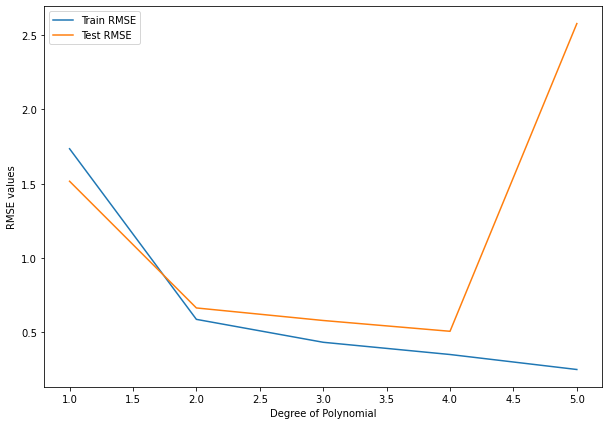

In [51]:
find_optimal_complexity(n=10, x = X, Y= y)

**Model Deployment**
* After find out the optimal poly degree we can finalize our model and than save and load it.

In [52]:
# Final converter
final_converter = PolynomialFeatures(degree = 3,
                                    include_bias = False)

In [54]:
converted_featueres = final_converter.fit_transform(X)

In [55]:
# final model
final_poly_model = LinearRegression()
final_history = final_poly_model.fit(converted_featueres,y) 

In [58]:
# save and load model
from joblib import dump,load

In [63]:
dump(final_converter, "Final_Converter"),
dump(final_poly_model, "Final_Poly_Model")

['Final_Poly_Model']

In [64]:
loaded_converter = load('Final_Converter')

In [65]:
loaded_model = load('Final_Poly_Model')

In [66]:
test_data = [[149,45,68]]

In [67]:
test_converted_data = loaded_converter.fit_transform(test_data)

In [68]:
loaded_model.predict(test_converted_data)

array([19.22960216])

## Feature Scaling
* **It means the data which is feed to the model is must to be in same scale**

* **Benifits of Feature Scaling**
   * 1.**Feature scaling doesn't have any downside**
   * 2.**Absolutely necessary for some models(eg. KNN)**
   * 3.**Can lead to great performance** 

* **There are two ways of feature scaling**

    * 1.**Standardization** - Rescale data to have **mean =  0** and **standard deviation = 1**
    
    *  2.**Normalization** - Rescaling all data in between **0-1**

## Regularization
* **Regularization is a process which is use to solve some issue of model by using:**
    * **1.** Minimizing model complexity
    * **2.** Penalizing loss function
    * **3.** Reducing model's overfitting
    
### There are mainly three type of Regularization:
* **1. L1 Regularization**
        * `LASSO Regression`
* **2. L2 Regularization**
        * `Ridge Regression`
* **3. L1 anb L3 Regularization**
        * `Elastic Net`

**Setup data for regularization**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
new_df = pd.read_csv("C:\\Users\\Rahul\\ML_data\\ad.csv")
new_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X_new = new_df.drop(["sales"], axis = 1)
X_new.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
y_new = new_df["sales"]
y_new.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly_converter = PolynomialFeatures(degree=3,
                                   include_bias = False)

In [9]:
poly_features = poly_converter.fit_transform(X_new)

In [6]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y_new,
                                                   test_size = 0.3,
                                                   random_state = 101)

In [17]:
# Now scaling our data
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
scaled_X_train = scaler.transform(X_train)


In [23]:
scaled_X_test = scaler.transform(X_test)

In [24]:
scaled_X_test[0]

array([-0.91339472,  1.76259419,  0.68168558, -0.96397506,  0.01521221,
       -0.29304821,  2.31532893,  1.56001049,  0.36991011, -0.87527811,
       -0.53295016, -0.54312331,  0.43542739,  0.18669917, -0.2012045 ,
        2.77252075,  2.09516506,  0.89465642,  0.09868885])

## L2 Regularization
* **Ridge Regression -- It consider the squared value as a panlty term** 

In [25]:
from sklearn.linear_model import Ridge

In [26]:
ridge_model = Ridge(alpha = 10)

In [27]:
# Fit ridge model
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [29]:
ridge_preds = ridge_model.predict(X_test)
ridge_preds

array([14.61569468, 19.05556819, 12.6039876 , 17.28961187,  7.78864909,
        6.81305993, 19.95694185, 17.13239239, 10.40444174, 19.71335719,
        9.40991502, 13.98886007, 11.61931653, 22.97819913, 18.94783794,
        9.4058409 , 12.33353412,  9.43920912,  8.75105786, 21.27810981,
        6.82406417, 19.30197888, 27.38926848, 24.37115969,  9.48061721,
       11.25353193, 20.72759282,  9.64075111, 12.52208246,  8.43511532,
        8.82148151, 19.76590095, 10.92332395,  6.96458976, 18.08107682,
        9.45089373, 10.72035992,  9.94307289,  7.08249035, 10.77031383,
       12.02882303, 10.34159528, 11.58236565,  7.64519503, 11.89297429,
       10.74690635,  5.14649688, 15.2778868 , 12.95968984, 22.42599783,
       10.71875617, 12.7793645 , 14.8969074 , 12.2440065 , 11.12965535,
        4.91715713, 24.94861314,  9.50073701, 17.29060618, 15.53931369])

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
MAE = mean_absolute_error(y_test, ridge_preds)
MAE

0.41268949370739266

In [53]:
RMSE = np.sqrt(mean_squared_error(y_test, ridge_preds))

In [54]:
RMSE

0.5805273045659067

**For find out best alpha vaslue we use `RidgeCV model`**

In [34]:
from sklearn.linear_model import RidgeCV

In [35]:
# for find out the scoring metrics
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [48]:
ridge_cv_model = RidgeCV(alphas = (0.1, 1.0, 10.0),
                        scoring ='neg_mean_absolute_error' )

In [49]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [52]:
ridge_cv_model.alpha_

10.0

In [56]:
ridge_cv_preds = ridge_cv_model.predict(X_test)

In [57]:
MAE = mean_absolute_error(y_test, ridge_cv_preds)
MAE

0.6557988200919053

In [58]:
RMSE = np.sqrt(mean_squared_error(y_test, ridge_cv_preds))
RMSE

0.8501490287838902

In [60]:
ridge_cv_model.coef_

array([ 8.51968371e-02,  2.99658968e-02,  1.20416099e-02, -4.07133838e-04,
        1.55118150e-03, -3.34145617e-04, -1.74740473e-03,  8.97282506e-04,
        2.56929054e-04,  7.81285053e-07, -1.76613321e-06,  1.07781216e-06,
        2.61235675e-06, -1.71892634e-06,  2.84462658e-08,  2.18380566e-05,
       -8.51356924e-06, -3.72066677e-06, -1.91520962e-06])

## L1 Regularization
* **LASSO(least absolute shrinkage and selection operator) Regression -- It consider absolute value as penalty term**

In [61]:
from sklearn.linear_model import LassoCV

In [66]:
lasso_cv_model = LassoCV(eps=0.001,
                       n_alphas = 100,
                       cv = 5)

In [67]:
# Fit the model 
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5)

In [68]:
lasso_cv_model.alpha_

23954.310622080102

In [69]:
lasso_preds = lasso_cv_model.predict(X_test)
lasso_preds

array([12.96069628, 19.6671019 , 11.23840679, 14.74941686, 10.35849936,
       10.1402829 , 20.81599248, 16.15006685, 10.43029739, 18.91903149,
       10.93097952, 12.67060036, 11.59795582, 22.30691819, 17.38068212,
       10.56452759, 12.40148026, 10.1836883 , 10.24239507, 21.13312766,
       10.17816211, 17.25360462, 31.54511442, 26.22347991, 10.31570212,
       10.9921257 , 23.17369773, 10.29536614, 11.5318884 , 10.49802655,
       10.4432991 , 18.89206171, 10.60609839, 10.11102853, 16.09343223,
       10.14731358, 10.53126357, 10.30773563, 10.25401316, 10.62575374,
       11.54271622, 10.36731053, 10.77845764, 10.18550456, 11.20683031,
       10.73289192, 10.12191332, 14.09222297, 11.6852337 , 21.44342123,
       11.06222413, 12.08520501, 14.88623811, 11.17901005, 11.02926807,
       10.07388674, 28.13970918, 11.0075053 , 17.90182578, 13.72542548])

In [71]:
MAE = mean_absolute_error(y_true = y_test, y_pred = lasso_preds)
MAE

1.3018706584630582

In [72]:
RMSE = np.sqrt(mean_squared_error(y_test, lasso_preds))
RMSE

1.866983482837324

In [75]:
lasso_cv_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.58795042e-08,  3.47802818e-06, -2.10588790e-07,
        1.06879921e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

## L1 & L2 Regularization
* **Elastic Net**

In [77]:
from sklearn.linear_model import ElasticNetCV

In [81]:
elastic_model = ElasticNetCV(l1_ratio = [.1, .5, .7,
    .9, .95, .99, 1],eps = 0.002, n_alphas = 100, cv = 5,
                             max_iter = 1000000)

In [82]:
# Fit the model
elastic_model.fit(X_train, y_train)

ElasticNetCV(cv=5, eps=0.002, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=1000000)

In [83]:
elastic_model.alpha_

47908.62124416021

In [84]:
# prediction
elastic_model_preds = elastic_model.predict(X_test)
elastic_model_preds

array([11.88484167, 20.30443389, 11.48724459, 13.50750171, 10.47949741,
       10.37011972, 21.45939089, 16.60594297, 10.54528523, 19.11517283,
       10.68081304, 13.05315317, 11.28784089, 20.93093463, 17.24761217,
       10.62605226, 11.64446155, 10.40542962, 10.49122757, 21.12144378,
       10.38116656, 16.72051154, 30.95911855, 26.0896312 , 10.58833365,
       10.82536319, 24.00788126, 10.54399606, 11.82037427, 10.42180738,
       10.45015893, 19.06084889, 10.82578684, 10.35131343, 16.01772062,
       10.36362612, 10.80313211, 10.57454684, 10.3696047 , 10.70197296,
       11.18884974, 10.48497656, 11.03418401, 10.37863076, 11.19870938,
       10.87698281, 10.34330378, 14.46122306, 11.94948547, 20.25283518,
       10.77621455, 12.20864088, 14.68931739, 11.47294322, 10.8384159 ,
       10.33786289, 28.03813406, 10.71769645, 18.47800307, 14.05286566])

In [85]:
# Evaluate model
MAE = mean_absolute_error(y_test, elastic_model_preds)
MAE

1.4220327716613939

In [86]:
RMSE = np.sqrt(mean_squared_error(y_test, elastic_model_preds))

In [87]:
RMSE

2.0196803835764574

In [88]:
elastic_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.53263257e-08,  5.53996772e-06, -2.31546954e-07,
        4.04793193e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [89]:
elastic_model.l1_ratio_

1.0